# **PROYECTO DATA SCIENCE** *Parte 1*

### El presente trabajo se propone analizar el comportamiento financiero de los clientes de tarjetas de crédito a través de un dataset obtenido de Kaggle, que contiene información detallada sobre diversos aspectos demográficos, de comportamiento y de producto.
Entre las variables analizadas se encuentran el identificador único del cliente (CLIENTNUM), la bandera de inactividad o cierre de cuenta (Attrition_Flag), la edad del cliente (Customer_Age), el género (Gender), la cantidad de dependientes (Dependent_count), el nivel educativo (Education_Level), el estado civil (Marital_Status), la categoría de ingreso (Income_Category) y la categoría de la tarjeta (Card_Category), entre otras. Esta fuente de datos permite explorar no solo patrones generales en el comportamiento financiero, sino también diferencias significativas entre subgrupos de clientes.

Una de las líneas de investigación se enfoca en contrastar el comportamiento de los clientes que tienen dependientes, lo que podría interpretarse como aquellos con hijos, frente a aquellos que no los tienen. Se analizará si al tener una mayor obligación familiar,  influiría significativamente en el comportamiento de gasto y utilización del crédito. Además, se pretende analizar cómo varían estos comportamientos en función de la edad de los clientes, explorando si existen diferencias notables en el uso de la tarjeta, en el límite de crédito y en los montos de transacciones realizadas.

### **HIPOTESIS**

## *1 "Los clientes con mayores ingresos tienen más saldo disponible para gastar en su tarjeta."*

Se analizará la relación entre Income_Category y Avg_Open_To_Buy (crédito disponible), para verificar si los clientes de ingresos más altos mantienen un mayor margen de gasto en sus tarjetas.

## *2 Los clientes con más hijos tienen un mayor saldo impago en su tarjeta de crédito.*

Se evaluará la relación entre Dependent_count y Total_Revolving_Bal, para determinar si el aumento en la cantidad de dependientes impacta en un mayor uso del crédito sin pago total del saldo.

## *3 Los clientes con mayores ingresos tienen una tarjeta me mejor categoría que los que tienen menos ingresos.*

Se analizará la relación entre Income_Category y Card_Category, conociendo las siguientes jerarquías de menor a mayor (a menor ingreso se le otorga una tarjeta de mejor jerarquía)

**BLUE - GOLD - PLATINIUM - SILVER**

# **Explicación de las columnas**


# *Variables cualitativas*:

*Attrition_Flag* → Estado del cliente (Activo o Inactivo).

*Gender* → Género (M/F).

*Education_Level* → Nivel educativo (High School, Graduate, etc.).

*Marital_Status* → Estado civil (Married, Single, Divorced, Unknown).

*Income_Category* → Categoría de ingresos (Ejemplo: <$40K, $40K-$60K, etc.).

*Card_Category* → Tipo de tarjeta (Blue, Silver, Gold, Platinum).

# *Variables cuantitativas:*

*Customer_Age* → Edad del cliente.

*Dependent_count* → Cantidad de dependientes.

*Months_on_book* → Cantidad de meses con la cuenta activa.

*Total_Relationship_Count* → Número total de productos financieros del cliente.

*Months_Inactive_12_mon* → Meses inactivos en los últimos 12 meses.

*Contacts_Count_12_mon* → Cantidad de veces que el cliente contactó al banco en 12 meses.

*Credit_Limit* → Límite de crédito otorgado.

*Total_Revolving_Bal* → Saldo impago en la tarjeta de crédito.

*Avg_Open_To_Buy* → Crédito disponible para gastar.

*Total_Amt_Chng_Q4_Q1* → Cambio en el monto de transacciones entre Q4 y Q1.

*Total_Trans_Amt* → Monto total gastado en los últimos 12 meses.

*Total_Trans_Ct* → Cantidad total de transacciones en los últimos 12 meses.

*Total_Ct_Chng_Q4_Q1* → Cambio en la cantidad de transacciones entre Q4 y Q1.

* Avg_Utilization_Ratio → Porcentaje de utilización del crédito disponible.

***Las últimas 2 columnas no deben tomarse en cuenta para realizar analisis:***
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2



In [1]:
# Importolas librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Monto Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Defino la ruta al archivo CSV en mi Google Drive
ruta_csv = '/content/drive/My Drive/Data_Science_Entrega1/BankChurners.csv'

In [4]:
# Leemos el archivo CSV en un DataFrame
df = pd.read_csv(ruta_csv)

In [ ]:
# Mostramos las primeras filas para verificar la información
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Información general del dataset: tipos de datos, cantidad de valores no nulos, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# Resumen estadístico
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
# Reemplazar los valores "unknown" en Income_Category por NaN
df['Income_Category'] = df['Income_Category'].replace('unknown', np.nan)

# Verificar los cambios
print(df['Income_Category'].isnull().sum())  # Ver cuántos valores NaN hay ahora

0


In [6]:
# Consultamos valores únicos en la columna Income_Category
print(df['Income_Category'].unique())

# y el tipo de datos de la columna Income_Category
print(df['Income_Category'].dtype)

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
object


# Realizaremos un gráfico para la Hipotesis 1

*Los clientes con más hijos tienen un mayor saldo impago en su tarjeta de crédito.*

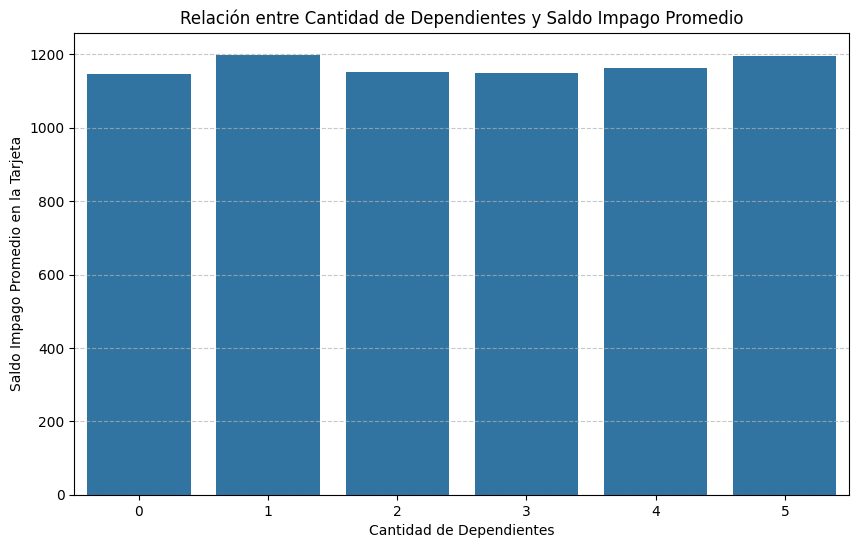

In [7]:
# Calcular el saldo impago promedio por cantidad de dependientes
df_grouped = df.groupby("Dependent_count")["Total_Revolving_Bal"].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x="Dependent_count", y="Total_Revolving_Bal")

# Mejoramos la visualización
plt.xlabel("Cantidad de Dependientes")
plt.ylabel("Saldo Impago Promedio en la Tarjeta")
plt.title("Relación entre Cantidad de Dependientes y Saldo Impago Promedio")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

Cada barra representa el saldo impago promedio para cada cantidad de dependientes.

Podemos evidenciar que no guarda relación la cantidad de dependientes y el saldo impago de la tarjeta.


# Realizaremos un grafico para la Hipotesis 2

*Los clientes con mayores ingresos tienen más saldo disponible para gastar en su tarjeta.*

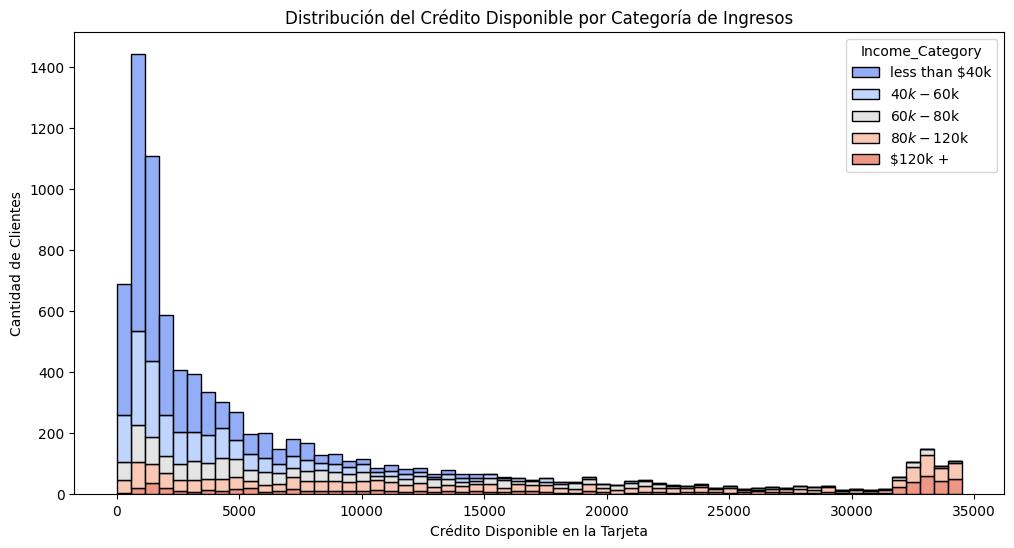

In [ ]:
#Configurar tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear histograma apilado
sns.histplot(data=df, x="Avg_Open_To_Buy", hue="Income_Category", bins=60, kde=False, multiple="stack", palette="coolwarm")

# Mejorar etiquetas y título
plt.xlabel("Crédito Disponible en la Tarjeta")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución del Crédito Disponible por Categoría de Ingresos")

# Mostrar gráfico
plt.show()

Cada barra representa la cantidad de clientes en distintos rangos de saldo disponible.

Los colores muestran la proporción de cada nivel de ingresos en cada grupo de saldo.

En este gráfico podemos ver que los clientes con mayores ingresos tienen más saldo disponible, pero hay menor cantida de clientes con mayor saldo y mayor nivel de ingresos.

<ipython-input-73-72626b5ddcf1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


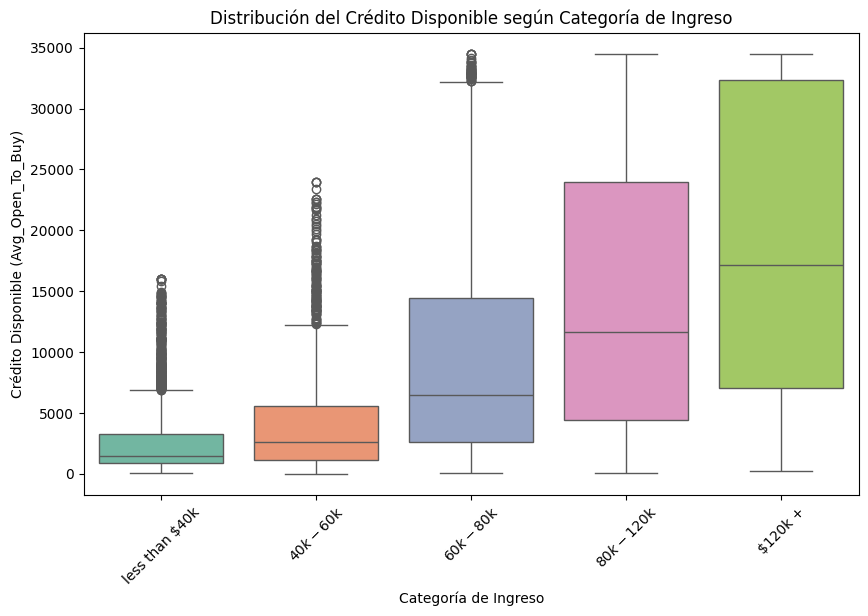

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de bigotes
sns.boxplot(
    data=df,
    x="Income_Category",
    y="Avg_Open_To_Buy",
    palette="Set2"
)

# Personalizar etiquetas
plt.xlabel("Categoría de Ingreso")
plt.ylabel("Crédito Disponible (Avg_Open_To_Buy)")
plt.title("Distribución del Crédito Disponible según Categoría de Ingreso")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Este gráfico de cajas nos permite ver que los clientes con mayores ingresos tienden a tener más crédito disponible.

Ya que si la caja es más alta, significa que tienen más saldo sin usar.

Mediana → Línea dentro de la caja, que indica el valor central.

Valores atípicos (outliers) → Puntos fuera de los bigotes, que representan datos extremos.

# Graficaremos la hipotesis 3

*Los clientes con mayores ingresos tienen una tarjeta de mejor categoría que los que tienen menos ingresos.*

## Analizaremos como es la Distribucuón de las categorías de las tarjetas

<ipython-input-48-7dc92c722b10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Card_Category", palette="viridis")


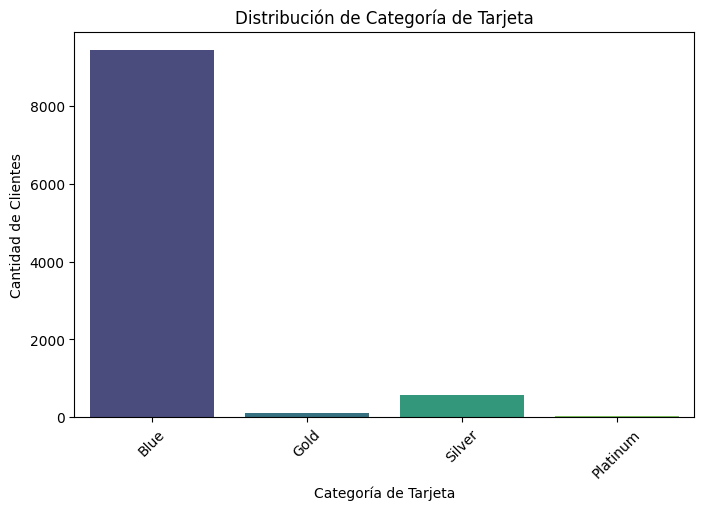

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 5))

# Contar la cantidad de clientes por categoría de tarjeta
sns.countplot(data=df, x="Card_Category", palette="viridis")

# Mejorar etiquetas y título
plt.xlabel("Categoría de Tarjeta")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de Categoría de Tarjeta")
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

## Le agregamos el nivel de ingresos

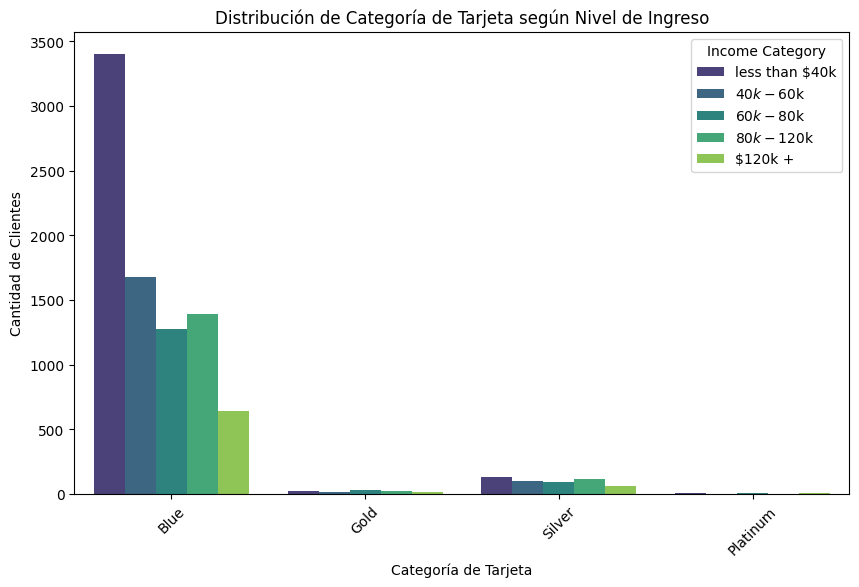

In [ ]:
#Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear gráfico de barras agrupadas
sns.countplot(data=df, x="Card_Category", hue="Income_Category", palette="viridis")

# Mejorar etiquetas y título
plt.xlabel("Categoría de Tarjeta")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de Categoría de Tarjeta según Nivel de Ingreso")
plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(title="Income Category")

# Mostrar gráfico
plt.show()

En el eje X se muestran las categorías de ingresos.

En el eje Y se ve la cantidad de clientes en cada nivel de ingresos.

Cada barra está dividida en colores por tipo de tarjeta (Card_Category).

En este gráfico podemos verificar que los niveles de tarjeta no dependen del nivel de ingreso.

Analizaremos en el siguiete gráfico como es la relación entre la antigüedad en la entidad bancaria, la categoría de ingreso y las categorías de tarjetas, para verificar si a mayor antigüedad, mejor es la categoría de la tarjeta brindada

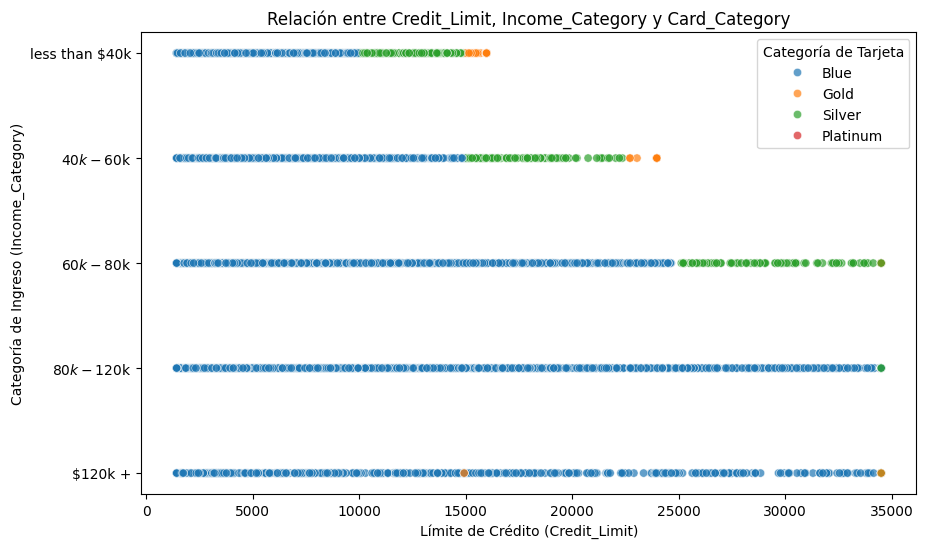

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el scatter plot con color por categoría de tarjeta
sns.scatterplot(
    data=df,
    x="Credit_Limit",
    y="Income_Category",
    hue="Card_Category",
    alpha=0.7
)

# Personalización del gráfico
plt.xlabel("Límite de Crédito (Credit_Limit)")
plt.ylabel("Categoría de Ingreso (Income_Category)")
plt.title("Relación entre Credit_Limit, Income_Category y Card_Category")
plt.legend(title="Categoría de Tarjeta")

# Mostrar el gráfico
plt.show()

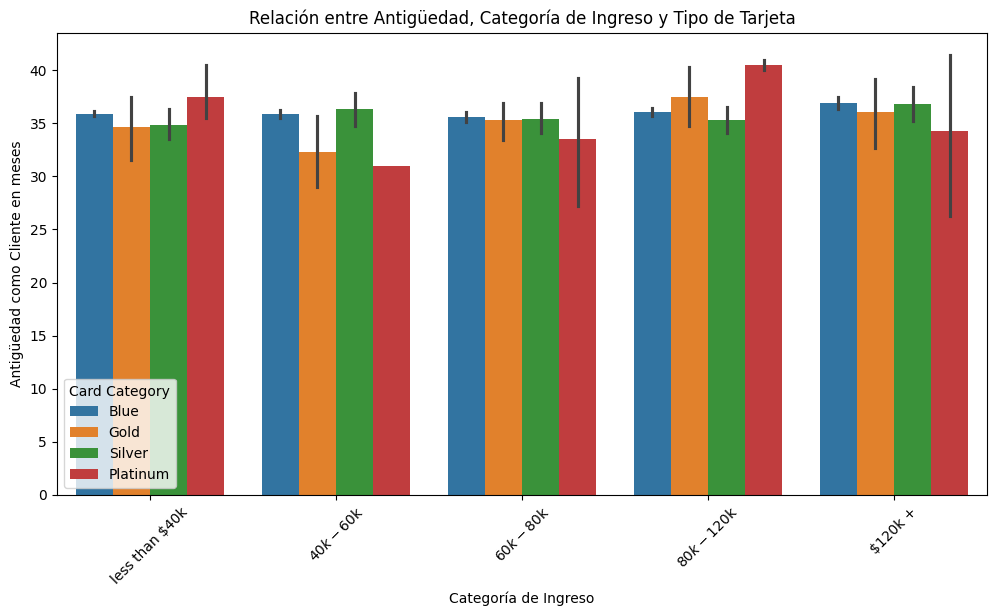

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras agrupadas
sns.barplot(
    data=df,
    x="Income_Category",
    y="Months_on_book",
    hue="Card_Category",
    estimator="mean",

)

# Personalizar etiquetas
plt.xlabel("Categoría de Ingreso")
plt.ylabel("Antigüedad como Cliente en meses")
plt.title("Relación entre Antigüedad, Categoría de Ingreso y Tipo de Tarjeta")
plt.xticks(rotation=45)
plt.legend(title="Card Category")

# Mostrar el gráfico
plt.show()

### Con este último gráfico podemos verificar que la categoría de la tarjeta no tiene relación con la Categoría de Ingreso ni la antigüedad del cliente.